# Dask and XArray to visualize NetCDF satellite data

### AVISO Dataset

**Archiving, Validation and Interpretation of Satellite Oceanographic data** (AVISO) data set contains climate data combined with precise satellite location and altimetry measurement data. <br />
For more information, please visit the following site: https://www.aviso.altimetry.fr/en/home.html <br />
In this notebook, one year worth of AVISO data will be downloaded and displayed on the screen. 

In [1]:
# import all the modules 
import  wget
from    pathlib import Path
import  tarfile
import  os
import  xarray as xr
from    pathlib import Path
import  matplotlib

### Download the NetCDF files 

In [2]:
download_path = str(Path.home() / "Downloads")
url            = 'http://www.ldeo.columbia.edu/~rpa/aviso_madt_2015.tar.gz'
print("Downloading to the folder:", download_path)
download_file  = wget.download(url, out=download_path)
print("\nDownload complete")

100% [......................................................................] 494834680 / 494834680
Download complete


### Extract the data archive files

In [4]:
nc_tar = tarfile.open(download_file)
nc_tar.extractall(download_path)  
nc_tar.close()
print("Extraction complete")

Extraction complete


### Show the total nunber of files in the directory

In [5]:
download_path = str(Path.home() / "Downloads")
path, dirs, files = next(os.walk(download_path + "//2015"))
file_count = len(files)
print ("Total files in the folder:", file_count)

Total files in the folder: 366


### Read all the NetCDF metadata

In [6]:
ds = xr.open_mfdataset(download_path+'//2015//*.nc')
with xr.set_options(display_style="html"):
    display(ds)

<xarray.Dataset>
Dimensions:   (time: 365, lat: 720, nv: 2, lon: 1440)
Coordinates:
  * time      (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31
  * lat       (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * nv        (nv) int32 0 1
Data variables:
    lat_bnds  (time, lat, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds  (time, lon, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    crs       (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    adt       (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Absolute Dynamic Topography
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    summary:                         Delayed-Time Level-4 sea surface height ...
    time_coverage_duration:          P1D
    time_coverage_end:               2015-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2014-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [11]:
ds_adt = ds.adt

print ("Total data read:", ds_adt.nbytes / 1e9, "GB")

with xr.set_options(display_style="html"):
    display(ds_adt)

Total data read: 3.027456 GB


<xarray.DataArray 'adt' (time: 365, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(365, 720, 1440), dtype=float64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    grid_mapping:   crs
    long_name:      Absolute Dynamic Topography
    standard_name:  sea_surface_height_above_geoid
    units:          m

#### Plot first four days data 

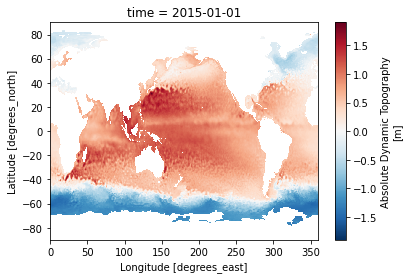

In [12]:
ds_adt[0].plot()

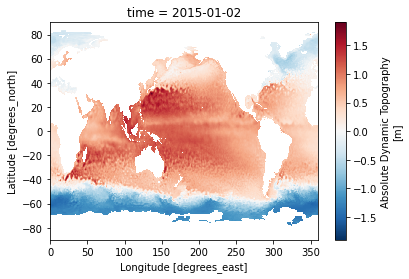

In [13]:
ds_adt[1].plot()

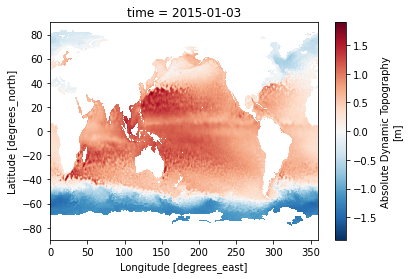

In [14]:
ds_adt[2].plot()

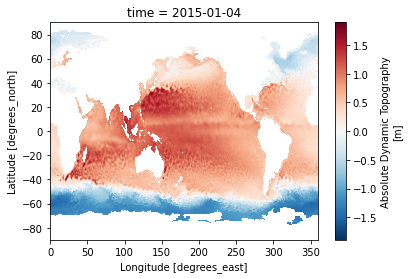

In [15]:
ds_adt[3].plot()

#### Plot last four days of the year

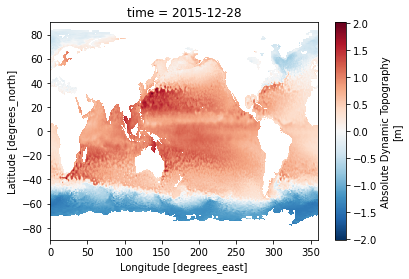

In [16]:
ds_adt[361].plot()

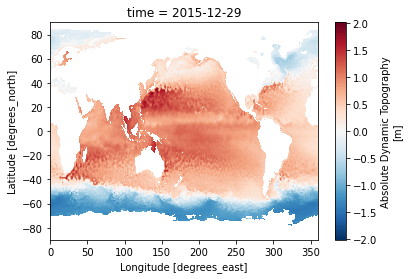

In [17]:
ds_adt[362].plot()

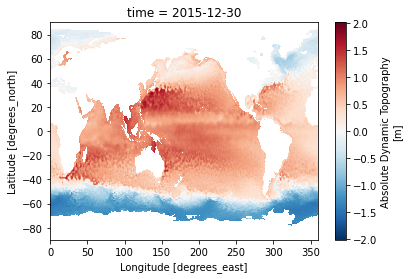

In [18]:
ds_adt[363].plot()

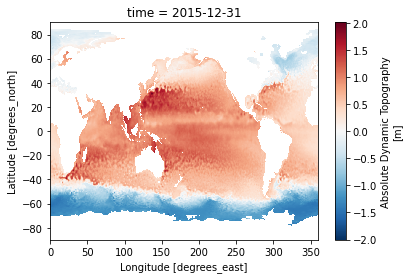

In [19]:
ds_adt[364].plot()

#### Plot the average of the year

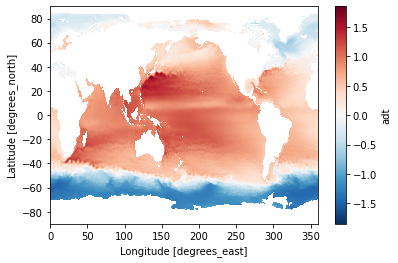

In [20]:
yearly_mean = ds_adt.mean(dim='time')
yearly_mean.plot() 